# Sparsh Khanna

## Research question/interests
My research question/interest is to find out who are the top 4 bowlers of all time in IPL. I plan to use the data in my dataset in a way that i assign a score or a value for a particular stat for each bowler. For example number of wickets have a certain score value , number of dots bowled is a value , the number of extras given and much more . Using these scoring metrics i will have a list of all the bowlers and their designated score from which i can make the final 4. I also plan to add more columns like period of the game(opening or death) which will help me in improving my analysis. 

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
# Your Solution Here
# Themes and colours in Seaborn

# There are five preset seaborn themes: darkgrid, whitegrid, dark, white, and ticks. 
# They are each suited to different applications and personal preferences.
# You can see what they look like [here](https://seaborn.pydata.org/tutorial/aesthetics.html#seaborn-figure-styles)

# Just for fun, we're going to set the theme to be a nice one:
sns.set_theme(style="ticks",
              font_scale=1.3, # This scales the fonts slightly higher
             )
# And we're going to remove the top and right axis lines
import matplotlib.pyplot as plt
plt.rc("axes.spines", top=False, right=False)
import pandas as pd
ball_by_ball = pd.read_csv("../data/raw/IPL_Ball_by_Ball_2008_2022.csv")

ball_by_ball['ballcounter']=1
ball_by_ball

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,ballcounter
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals,1
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals,1
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals,1
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals,1
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225949,335982,2,14,5,P Kumar,I Sharma,SB Joshi,legbyes,0,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,1
225950,335982,2,14,6,SB Joshi,I Sharma,P Kumar,NaN,1,0,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,1
225951,335982,2,14,7,P Kumar,I Sharma,SB Joshi,NaN,0,0,0,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,1
225952,335982,2,15,1,SB Joshi,LR Shukla,P Kumar,wides,0,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,1


In [39]:
import pandas as pd
matches = pd.read_csv("../data/raw/IPL_Matches_2008_2022 (1).csv")
matches

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,335986,Kolkata,2008-04-20,2007/08,4,Kolkata Knight Riders,Deccan Chargers,Eden Gardens,Deccan Chargers,bat,N,Kolkata Knight Riders,Wickets,5.0,NaN,DJ Hussey,"['WP Saha', 'BB McCullum', 'RT Ponting', 'SC G...","['AC Gilchrist', 'Y Venugopal Rao', 'VVS Laxma...",BF Bowden,K Hariharan
946,335985,Mumbai,2008-04-20,2007/08,5,Mumbai Indians,Royal Challengers Bangalore,Wankhede Stadium,Mumbai Indians,bat,N,Royal Challengers Bangalore,Wickets,5.0,NaN,MV Boucher,"['L Ronchi', 'ST Jayasuriya', 'DJ Thornely', '...","['S Chanderpaul', 'R Dravid', 'LRPL Taylor', '...",SJ Davis,DJ Harper
947,335984,Delhi,2008-04-19,2007/08,3,Delhi Daredevils,Rajasthan Royals,Feroz Shah Kotla,Rajasthan Royals,bat,N,Delhi Daredevils,Wickets,9.0,NaN,MF Maharoof,"['G Gambhir', 'V Sehwag', 'S Dhawan', 'MK Tiwa...","['T Kohli', 'YK Pathan', 'SR Watson', 'M Kaif'...",Aleem Dar,GA Pratapkumar
948,335983,Chandigarh,2008-04-19,2007/08,2,Kings XI Punjab,Chennai Super Kings,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,bat,N,Chennai Super Kings,Runs,33.0,NaN,MEK Hussey,"['K Goel', 'JR Hopes', 'KC Sangakkara', 'Yuvra...","['PA Patel', 'ML Hayden', 'MEK Hussey', 'MS Dh...",MR Benson,SL Shastri


In [40]:
import pandas as pd
bowling_data = ball_by_ball[['ID','bowler', 'total_run', 'isWicketDelivery', 'extras_run', 'ballcounter']]
bowler_stats = bowling_data.groupby('bowler').agg({'total_run': 'sum', 'isWicketDelivery': 'sum', 'extras_run': 'sum', 'ballcounter': 'sum'})
bowler_stats.rename(columns={'total_runs': 'runs_given', 'isWicketDelivery':'wickets_taken', 'extras_run': 'extras_given', 'ballcounter': 'balls_bowled'}, inplace=True)
bowler_stats['overs_bowled'] = bowler_stats['balls_bowled'] // 6
bowler_stats=bowler_stats[bowler_stats['overs_bowled']>=300]
bowler_stats.sort_values(by='wickets_taken', ascending=False, inplace=True)
bowler_stats['Economy Rate']=bowler_stats['total_run']/bowler_stats['overs_bowled']
bowler_stats.replace([np.inf, -np.inf], 0, inplace=True)
# Print the summary
print(bowler_stats)
bowlerlistdescription=bowler_stats.describe(include="all")
bowlerlistdescription
#bowler_stats.to_csv("../data/processed/bowlerstatssparsh.csv")

                 total_run  wickets_taken  extras_given  balls_bowled  \
bowler                                                                  
DJ Bravo              4436            207           258          3296   
SL Malinga            3486            188           292          2974   
A Mishra              4022            175           125          3317   
R Ashwin              4596            174           209          4024   
YS Chahal             3699            172           175          2940   
SP Narine             3907            171           152          3516   
PP Chawla             4368            165           134          3309   
B Kumar               4064            165           246          3384   
Harbhajan Singh       4101            161           173          3496   
JJ Bumrah             3499            161           201          2857   
UT Yadav              4041            153           250          2945   
RA Jadeja             4114            141          

,total_run,wickets_taken,extras_given,balls_bowled,overs_bowled,Economy Rate
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,3223.290323,130.483871,165.258065,2563.483871,426.903226,7.610976
std,718.400918,34.523297,51.764188,638.789682,106.372727,0.531429
min,2377.000000,74.000000,77.000000,1801.000000,300.000000,6.481183
25%,2560.000000,101.000000,125.500000,2032.000000,338.500000,7.268982
50%,3041.000000,119.000000,157.000000,2282.000000,380.000000,7.634085
75%,3964.500000,163.000000,189.000000,3118.000000,519.000000,7.994477
max,4596.000000,207.000000,292.000000,4024.000000,670.000000,8.687307


In [41]:
mask = (ball_by_ball['overs'] >= 16) & (ball_by_ball['overs'] <= 20)
filtered_ipl_data = ball_by_ball[mask]
bowler_stats1 = bowling_data.groupby('bowler').agg({'total_run': 'sum', 'isWicketDelivery': 'sum', 'extras_run': 'sum', 'ballcounter': 'sum'})
bowler_stats1                                                   

,total_run,isWicketDelivery,extras_run,ballcounter
bowler,,,,
A Ashish Reddy,400,19,14,270
A Badoni,12,2,1,12
A Chandila,245,11,3,234
A Choudhary,144,5,7,108
A Dananjaya,47,0,1,25
...,...,...,...,...
YK Pathan,1443,46,71,1184
YS Chahal,3699,172,175,2940
Yash Dayal,296,13,13,205


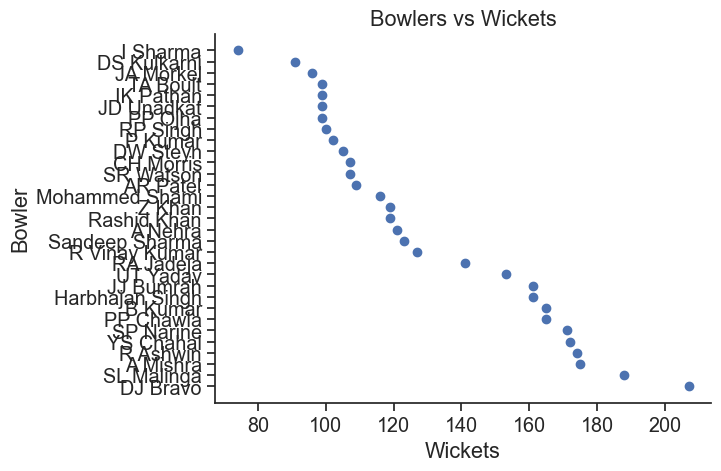

In [42]:

import matplotlib.pyplot as plt

plt.scatter(bowler_stats['wickets_taken'], bowler_stats.index)

# Set the x-axis label
plt.xlabel('Wickets')

# Set the y-axis label
plt.ylabel('Bowler')

# Set the plot title
plt.title('Bowlers vs Wickets')

# Show the plot
plt.show()

DJ Bravo has the most wickets. Malinga is second. They have been in IPL for a long time, thus, this makes sense.

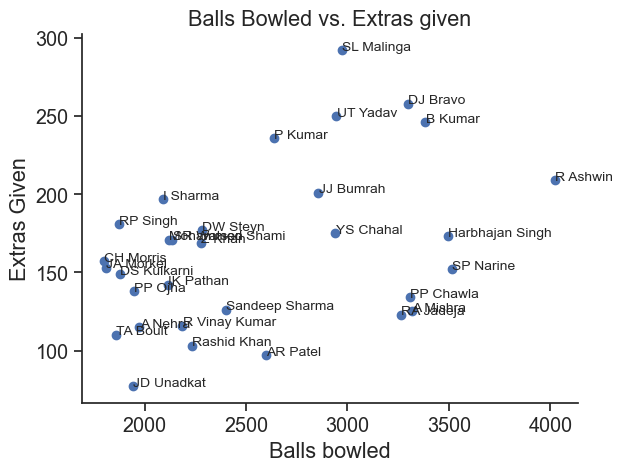

In [43]:
bs = bowler_stats
bs = bs.reset_index()

import matplotlib.pyplot as plt
import pandas as pd

fig, ax = plt.subplots()
ax.scatter(bs['balls_bowled'], bs['extras_given'])

for i, row in bs.iterrows():
    x, y = row['balls_bowled'], row['extras_given']
    ax.text(float(x)+1, float(y)+0.1, row['bowler'], fontsize=10)
    
ax.set_xlabel('Balls bowled')
ax.set_ylabel('Extras Given')
ax.set_title('Balls Bowled vs. Extras given')

plt.show()

R Ashwin has bowled the most bowls but has a rather low number of extras given. Thus, he can be relied upon to take charge in dire sitiations.

Text(0, 0.5, 'Bowler')

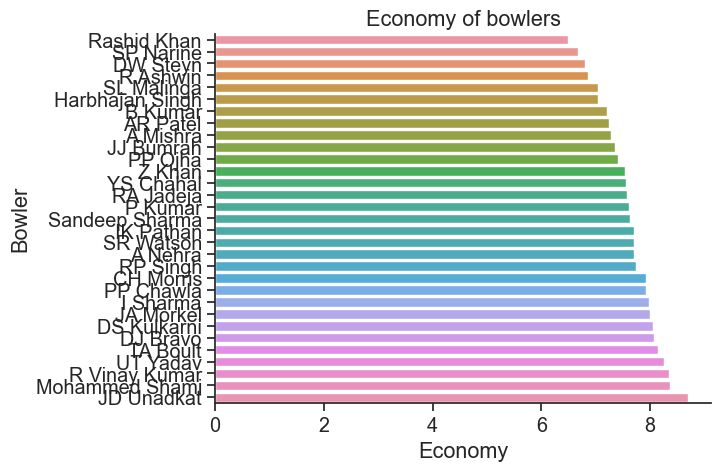

In [44]:
sns.barplot(data=bs.sort_values('Economy Rate'), x="Economy Rate", y="bowler")
plt.title('Economy of bowlers')
plt.xlabel('Economy')
plt.ylabel('Bowler')

From the top bowlers, R Khan has the lowest economy, while Unadkat has the highest. Low economy bowlers are preferred in general.

## ANALYSIS PIPELINE 

#### Load Data

In [45]:
from codes import project_functions2 as pf2
matches = pf2.load_and_process("../data/raw/IPL_Matches_2008_2022 (1).csv")
ball_by_ball = pf2.load_and_process("../data/raw/IPL_Ball_by_Ball_2008_2022.csv")
matches
ball_by_ball

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225949,335982,2,14,5,P Kumar,I Sharma,SB Joshi,legbyes,0,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
225950,335982,2,14,6,SB Joshi,I Sharma,P Kumar,NaN,1,0,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
225951,335982,2,14,7,P Kumar,I Sharma,SB Joshi,NaN,0,0,0,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
225952,335982,2,15,1,SB Joshi,LR Shukla,P Kumar,wides,0,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore


In [46]:
print(matches.columns.tolist())
print(ball_by_ball.columns.tolist())

['ID', 'City', 'Date', 'Season', 'MatchNumber', 'Team1', 'Team2', 'Venue', 'TossWinner', 'TossDecision', 'SuperOver', 'WinningTeam', 'WonBy', 'Margin', 'method', 'Player_of_Match', 'Team1Players', 'Team2Players', 'Umpire1', 'Umpire2']
['ID', 'innings', 'overs', 'ballnumber', 'batter', 'bowler', 'non-striker', 'extra_type', 'batsman_run', 'extras_run', 'total_run', 'non_boundary', 'isWicketDelivery', 'player_out', 'kind', 'fielders_involved', 'BattingTeam']


In [47]:
new_matches = matches.drop(columns = ['City','Date','Venue','TossWinner','TossDecision', 'SuperOver','WonBy', 'Margin', 'method','Umpire1', 'Umpire2'])
new_matches

,ID,Season,MatchNumber,Team1,Team2,WinningTeam,Player_of_Match,Team1Players,Team2Players
0,1312200,2022,Final,Rajasthan Royals,Gujarat Titans,Gujarat Titans,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan..."
1,1312199,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ..."
2,1312198,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,Royal Challengers Bangalore,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda..."
3,1312197,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,Gujarat Titans,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan..."
4,1304116,2022,70,Sunrisers Hyderabad,Punjab Kings,Punjab Kings,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',..."
...,...,...,...,...,...,...,...,...,...
945,335986,2007/08,4,Kolkata Knight Riders,Deccan Chargers,Kolkata Knight Riders,DJ Hussey,"['WP Saha', 'BB McCullum', 'RT Ponting', 'SC G...","['AC Gilchrist', 'Y Venugopal Rao', 'VVS Laxma..."
946,335985,2007/08,5,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,MV Boucher,"['L Ronchi', 'ST Jayasuriya', 'DJ Thornely', '...","['S Chanderpaul', 'R Dravid', 'LRPL Taylor', '..."
947,335984,2007/08,3,Delhi Daredevils,Rajasthan Royals,Delhi Daredevils,MF Maharoof,"['G Gambhir', 'V Sehwag', 'S Dhawan', 'MK Tiwa...","['T Kohli', 'YK Pathan', 'SR Watson', 'M Kaif'..."
948,335983,2007/08,2,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,MEK Hussey,"['K Goel', 'JR Hopes', 'KC Sangakkara', 'Yuvra...","['PA Patel', 'ML Hayden', 'MEK Hussey', 'MS Dh..."


In [48]:
new_ball = ball_by_ball.drop(columns = ['non-striker','kind', 'fielders_involved'])   
new_ball

,ID,innings,overs,ballnumber,batter,bowler,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,NaN,0,0,0,0,0,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,legbyes,0,1,1,0,0,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,NaN,1,0,1,0,0,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,NaN,0,0,0,0,0,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,NaN,0,0,0,0,0,NaN,Rajasthan Royals
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225949,335982,2,14,5,P Kumar,I Sharma,legbyes,0,1,1,0,0,NaN,Royal Challengers Bangalore
225950,335982,2,14,6,SB Joshi,I Sharma,NaN,1,0,1,0,0,NaN,Royal Challengers Bangalore
225951,335982,2,14,7,P Kumar,I Sharma,NaN,0,0,0,0,0,NaN,Royal Challengers Bangalore
225952,335982,2,15,1,SB Joshi,LR Shukla,wides,0,1,1,0,0,NaN,Royal Challengers Bangalore


In [49]:
new_ball.describe(include="all")

,ID,innings,overs,ballnumber,batter,bowler,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,BattingTeam
count,2.259540e+05,225954.000000,225954.000000,225954.000000,225954,225954,12049,225954.000000,225954.000000,225954.00000,225954.000000,225954.000000,11151,225954
unique,NaN,NaN,NaN,NaN,605,472,5,NaN,NaN,NaN,NaN,NaN,573,18
top,NaN,NaN,NaN,NaN,V Kohli,R Ashwin,wides,NaN,NaN,NaN,NaN,NaN,RG Sharma,Mumbai Indians
freq,NaN,NaN,NaN,NaN,5266,4024,7025,NaN,NaN,NaN,NaN,NaN,194,27826
mean,8.320470e+05,1.483868,9.185679,3.619750,NaN,NaN,NaN,1.243523,0.066907,1.31043,0.000093,0.049351,NaN,NaN
std,3.379542e+05,0.503104,5.681797,1.810633,NaN,NaN,NaN,1.618166,0.341470,1.60605,0.009640,0.216600,NaN,NaN
min,3.359820e+05,1.000000,0.000000,1.000000,NaN,NaN,NaN,0.000000,0.000000,0.00000,0.000000,0.000000,NaN,NaN
25%,5.012620e+05,1.000000,4.000000,2.000000,NaN,NaN,NaN,0.000000,0.000000,0.00000,0.000000,0.000000,NaN,NaN
50%,8.297370e+05,1.000000,9.000000,4.000000,NaN,NaN,NaN,1.000000,0.000000,1.00000,0.000000,0.000000,NaN,NaN
75%,1.178395e+06,2.000000,14.000000,5.000000,NaN,NaN,NaN,1.000000,0.000000,1.00000,0.000000,0.000000,NaN,NaN


#### Process and Wrangle Data

In [50]:
new_matches = new_matches[(new_matches['MatchNumber'] == 'Final') | (new_matches['MatchNumber'] == 'Eliminator') | (new_matches['MatchNumber'] == 'Qualifier 1') | (new_matches['MatchNumber'] == 'Qualifier 2')]
id_list = new_matches['ID'].tolist()
df3 = new_ball[new_ball['ID'].isin(id_list)]
b2 = df3.groupby('bowler')
bo2 = pf2.calculate_bowling_stats(b2)
bo2["Overs"]=bo2["Balls Bowled"]//6
bo2["Economy Rate"]= bo2["Total Runs"]/bo2["Overs"]
bo2

,Matches,Total Runs,Balls Bowled,Wickets,Overs,Economy Rate
bowler,,,,,,
A Kumble,1,18,24,4,4,4.500000
A Mishra,2,32,48,2,8,4.000000
A Mithun,3,80,44,1,7,11.428571
A Nehra,5,183,126,9,21,8.714286
A Nortje,5,174,113,6,18,9.666667
...,...,...,...,...,...,...
Washington Sundar,3,50,61,3,10,5.000000
YK Pathan,3,46,36,3,6,7.666667
YS Chahal,9,264,220,10,36,7.333333


In [51]:
df2 = new_ball[new_ball['overs'] >14]
b1 = df2.groupby('bowler')
bo1 = pf2.calculate_bowling_stats(b1)
bo1["Overs"]=bo1["Balls Bowled"]//6
bo1["Economy Rate"]= bo1["Total Runs"]/bo1["Overs"]
bo1

,Matches,Total Runs,Balls Bowled,Wickets,Overs,Economy Rate
bowler,,,,,,
A Ashish Reddy,13,169,105,11,17,9.941176
A Chandila,1,6,6,0,1,6.000000
A Choudhary,3,40,27,1,4,10.000000
A Flintoff,2,59,24,1,4,14.750000
A Kumble,28,217,174,18,29,7.482759
...,...,...,...,...,...,...
YK Pathan,14,127,81,4,13,9.769231
YS Chahal,72,685,466,45,77,8.896104
Yash Dayal,8,80,61,5,10,8.000000


## DATA ANALYSIS 

In [52]:
bowler_stats["Weighted Score"]= pf2.calculate_bowling_index(bowler_stats) + pf2.calculate_bowling_index1(bo2)+ pf2.calculate_bowling_index1(bo1)
bowler_stats

,total_run,wickets_taken,extras_given,balls_bowled,overs_bowled,Economy Rate,Weighted Score
bowler,,,,,,,
DJ Bravo,4436,207,258,3296,549,8.080146,6.427994
SL Malinga,3486,188,292,2974,495,7.042424,7.169072
A Mishra,4022,175,125,3317,552,7.286232,6.930125
R Ashwin,4596,174,209,4024,670,6.859701,5.198148
YS Chahal,3699,172,175,2940,490,7.548980,6.670440
SP Narine,3907,171,152,3516,586,6.667235,6.673142
PP Chawla,4368,165,134,3309,551,7.927405,6.328924
B Kumar,4064,165,246,3384,564,7.205674,5.544000
Harbhajan Singh,4101,161,173,3496,582,7.046392,6.241135


In [53]:
df_sorted = bowler_stats.sort_values('Weighted Score', ascending=False)
df_sorted = df_sorted.head(25)
df_sorted


,total_run,wickets_taken,extras_given,balls_bowled,overs_bowled,Economy Rate,Weighted Score
bowler,,,,,,,
A Nehra,2537,121,115,1974,329,7.711246,7.907547
SL Malinga,3486,188,292,2974,495,7.042424,7.169072
JJ Bumrah,3499,161,201,2857,476,7.350840,7.062064
A Mishra,4022,175,125,3317,552,7.286232,6.930125
Rashid Khan,2411,119,103,2232,372,6.481183,6.917657
SP Narine,3907,171,152,3516,586,6.667235,6.673142
YS Chahal,3699,172,175,2940,490,7.548980,6.670440
CH Morris,2377,107,157,1801,300,7.923333,6.598880
JA Morkel,2409,96,153,1807,301,8.003322,6.551232


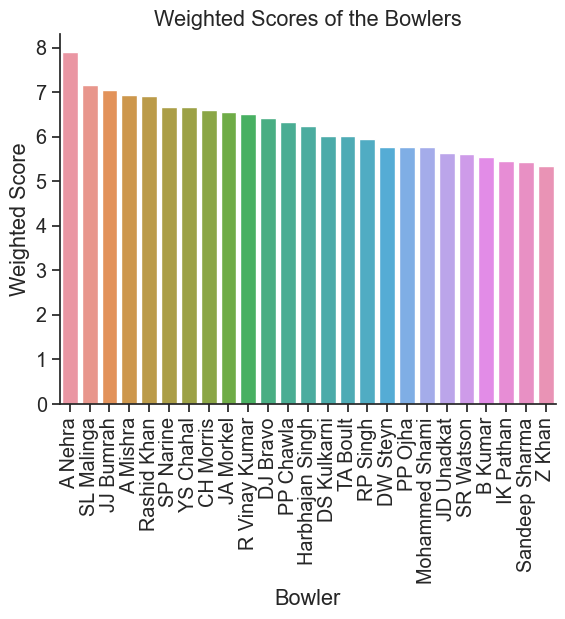

In [54]:
ax = sns.barplot(data=df_sorted,x=df_sorted.index,y="Weighted Score")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.xlabel('Bowler')
plt.ylabel('Weighted Score')
plt.title('Weighted Scores of the Bowlers')
plt.show()